##  📈 FA 25 STAT TEAM PROJECT  

### 📘 Project Title: Credit Card Transaction Analysis and Credit Limit Prediction

***

#### 📌 1. Project Introduction: Transaction Forecasting & Anomaly Detection

This project aims to analyze credit card transaction data to uncover consumer spending patterns and detect unusual (potentially fraudulent) activities.
In addition, by integrating macroeconomic indicators such as interest rates, the project seeks to predict customers’ potential credit limits, providing insights into both financial behavior and creditworthiness.

#### 🎯 2. Objectives
- Analyze customer spending behavior based on transaction categories and amounts
- Detect anomalous or fraudulent transaction patterns
- Incorporate economic factors (e.g., interest rates) to predict optimal credit limits
- Provide data-driven insights for responsible lending and risk management

<hr>

In [95]:
# import

import pandas as pd      
import numpy as np              
import matplotlib.pyplot as plt      
import seaborn as sns                 
sns.set()  

In [96]:
df = pd.read_csv("credit_card_transactions.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

merch zipcode column 제외하고는 전부 perfectly clean 

Unnamed: 0 column 불필요하다고 판단됨 (index랑 중복)

→ 두 columns drop

In [98]:
# data cleaning

df = df.drop(['Unnamed: 0', 'merch_zipcode'], axis=1)
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


---
### 🛠️ Feature Engineering

In [99]:
# Convert trans_date_trans_time to Datetime, and separate it to year, and month

df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df['Date']=df['trans_date_trans_time'].dt.date
df['year']=df['trans_date_trans_time'].dt.year
df['month']=df['trans_date_trans_time'].dt.month

In [100]:
# Convert dob to Age

df['dob'] = pd.to_datetime(df['dob'])
df['age'] = (df['trans_date_trans_time'] - df['dob']).dt.days // 365

In [101]:
# Total Spending Per Customer

df["total_spent"] = df.groupby("cc_num")["amt"].transform("sum")

In [102]:
# Transaction Frequency Per Customer

df["transaction_count"] = df.groupby("cc_num")["amt"].transform("count")

In [103]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,Date,year,month,age,total_spent,transaction_count
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1325376018,36.011293,-82.048315,0,2019-01-01,2019,1,30,177233.44,2028
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1325376044,49.159047,-118.186462,0,2019-01-01,2019,1,40,163466.44,3030
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1325376051,43.150704,-112.154481,0,2019-01-01,2019,1,56,33132.63,503
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1325376076,47.034331,-112.561071,0,2019-01-01,2019,1,52,35878.90,493
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1325376186,38.674999,-78.632459,0,2019-01-01,2019,1,32,191974.21,2017


---

### 👨🏻‍💼 Customer & Category Features Engineering


In [104]:
customer_features = df.groupby('cc_num').agg({
    'amt': ['sum', 'mean', 'count', 'std'],        # 총 지출액, 평균 거래금액, 거래 횟수, 지출의 표준편차(변동성)
    'category': pd.Series.nunique,                 # 거래한 상점 카테고리 개수 (소비 다양성)
    'city_pop': 'mean',                            # 거래가 이루어진 도시의 평균 인구 (생활권 규모 추정)
    'age': 'mean'                                 # 거래 시점에서의 평균 나이
}).reset_index()

# columns flatten

customer_features.columns = [
    'cc_num', 'total_spent', 'avg_transaction', 'transaction_count',
    'spending_std', 'category_diversity', 'avg_city_pop', 'avg_age'
]

# fraud_rate 계산

fraud_features = df.groupby('cc_num')['is_fraud'].mean().reset_index()
fraud_features.rename(columns={'is_fraud': 'fraud_rate'}, inplace=True)

# merge
customer_features = customer_features.merge(fraud_features, on='cc_num', how='left')

customer_features

,cc_num,total_spent,avg_transaction,transaction_count,spending_std,category_diversity,avg_city_pop,avg_age,fraud_rate
0,60416207185,85043.47,56.023366,1518,122.632635,14,1645.0,33.176548,0.005929
1,60422928733,105640.20,69.000784,1531,102.681962,14,46944.0,77.073155,0.007838
2,60423098130,58673.63,115.046333,510,1202.988005,14,83.0,60.662745,0.019608
3,60427851591,59129.61,111.987898,528,143.310653,14,2142.0,42.696970,0.026515
4,60487002085,25160.11,50.726028,496,65.843969,14,233060.0,46.653226,0.000000
...,...,...,...,...,...,...,...,...,...
978,4958589671582726883,97973.69,66.377839,1476,151.649600,14,43102.0,68.444444,0.000000
979,4973530368125489546,81508.22,78.373288,1040,299.269322,14,2786.0,53.519231,0.009615
980,4980323467523543940,39600.18,74.436429,532,130.051516,14,1966.0,71.483083,0.018797
981,4989847570577635369,88195.62,87.582542,1007,122.908864,14,8333.0,24.686197,0.000000


In [105]:
# 고객별 대표 직업 정보 추가
job_features = df.groupby('cc_num')['job'].first().reset_index()

# customer_features와 병합
customer_features = customer_features.merge(job_features, on='cc_num', how='left')

In [106]:
df['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

카테고리 정리:

misc_net	기타 온라인 결제, 특정 카테고리로 분류되지 않는 온라인 거래

grocery_pos	오프라인 식료품점(Point of Sale) 결제

entertainment	영화, 공연, 콘서트, 게임 등 엔터테인먼트 관련 소비

gas_transport	주유소·교통 관련 비용 (버스, 택시, 주차 등 포함 가능)

misc_pos	기타 오프라인 결제, 특정 카테고리로 분류되지 않은 POS 거래

grocery_net	온라인 식료품 결제 (배달, 온라인 마트)

shopping_net	온라인 쇼핑몰 결제 (의류, 전자제품 등)

shopping_pos	오프라인 쇼핑몰 결제 (의류, 가전 등)

food_dining	외식, 카페, 레스토랑 등 음식·식사 관련

personal_care	화장품, 미용, 헤어, 스파 등 개인 관리 비용

health_fitness	헬스장, 요가, 병원, 약국 등 건강·운동 관련 비용

travel	항공, 숙박, 여행사 등 여행 관련 비용

kids_pets	아이, 반려동물 관련 비용 (장난감, 사료 등)

home	가구, 인테리어, 집 관련 생활용품 비용


In [107]:
# 고객별 카테고리별 지출 내역

category_features = df.pivot_table(
    index='cc_num',
    columns='category',
    values='amt',
    aggfunc='sum',
    fill_value=0
).reset_index()

category_features

category,cc_num,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,60416207185,5327.22,2353.95,13221.64,2670.81,14646.56,4241.94,7604.69,6671.92,3020.70,4838.97,5629.21,3515.72,10893.96,406.18
1,60422928733,6857.47,9870.48,10121.71,2407.72,14740.06,4687.39,10213.69,11821.96,4037.81,6038.31,6036.51,9475.63,8832.35,499.11
2,60423098130,2290.18,2248.67,3641.47,37.27,5335.87,1708.76,1854.30,2741.89,1471.80,1141.46,2061.65,5262.95,1629.83,27247.53
3,60427851591,2985.29,1528.00,2081.52,1142.46,7818.85,2550.97,4798.08,2242.31,4213.20,1635.23,1553.62,9500.07,6355.39,10724.62
4,60487002085,1495.84,1884.46,3637.95,1009.63,4028.14,2270.87,2191.04,2641.24,192.06,2900.79,817.60,557.37,1444.32,88.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,4958589671582726883,5556.34,9035.06,9511.76,1750.75,14369.61,3384.93,9185.04,13632.10,3393.32,4892.67,4886.22,5051.46,7312.30,6012.13
979,4973530368125489546,3616.75,7995.42,8401.03,1423.58,9832.05,2258.09,5968.79,9658.18,3682.00,4672.95,2955.43,7320.28,4822.83,8900.84
980,4980323467523543940,2091.40,1576.75,4388.31,242.49,7317.95,2476.34,1848.63,2309.30,5331.48,1057.95,1863.82,5271.32,2807.90,1016.54
981,4989847570577635369,5714.66,4747.74,2527.69,4817.62,19808.47,3869.14,4774.60,5395.26,3403.03,6265.20,3578.06,10700.37,12498.93,94.85


이 카테고리들을 어떻게 이용/분류 할 것인가가 관건.

##### 📌 필수 소비 (Necessities) 
grocery_pos, grocery_net, gas_transport, personal_care 

-> 생필품, 교통, 생활 유지에 필요한 소비

##### 📌 자기계발·건강 (Wellbeing)
health_fitness, kids_pets, home

-> 가족, 건강, 집 관련 소비

##### 📌 사치·여가 (Luxury / Leisure)
entertainment, shopping_net, shopping_pos, travel

-> 여가, 여행, 패션, 사치품 소비

##### 📌 기타 (Miscellaneous)

misc_pos, misc_net

-> 분류 불가 거래

In [108]:
# 카테고리 그룹핑

def categorize_type(x):
    if x in ['grocery_pos', 'grocery_net', 'gas_transport', 'personal_care']:
        return 'necessity'     # 생필품 / 필수 소비
    elif x in ['health_fitness', 'kids_pets', 'home']:
        return 'wellbeing'     # 건강 / 가족 / 주거
    elif x in ['entertainment', 'shopping_net', 'shopping_pos', 'travel']:
        return 'luxury'        # 여가 / 사치 소비
    else:
        return 'misc'          # 기타 (알수 없는 거래들)
df['spend_type'] = df['category'].apply(categorize_type)

df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,merch_lat,merch_long,is_fraud,Date,year,month,age,total_spent,transaction_count,spend_type
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.011293,-82.048315,0,2019-01-01,2019,1,30,177233.44,2028,misc
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,49.159047,-118.186462,0,2019-01-01,2019,1,40,163466.44,3030,necessity
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,43.150704,-112.154481,0,2019-01-01,2019,1,56,33132.63,503,luxury
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,47.034331,-112.561071,0,2019-01-01,2019,1,52,35878.90,493,necessity
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.674999,-78.632459,0,2019-01-01,2019,1,32,191974.21,2017,misc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,36.841266,-111.690765,0,2020-06-21,2020,6,58,95594.78,1513,luxury
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,38.906881,-78.246528,0,2020-06-21,2020,6,40,53710.98,531,misc
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,33.619513,-105.130529,0,2020-06-21,2020,6,52,135038.51,2070,misc
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,42.788940,-103.241160,0,2020-06-21,2020,6,39,193805.47,2024,misc


In [109]:
# 각 고객-소비유형별 총액
spend_by_type = df.groupby(['cc_num', 'spend_type'])['amt'].sum().unstack(fill_value=0)

# 고객별 전체 소비액 대비 비율 계산
spend_by_type = spend_by_type.div(spend_by_type.sum(axis=1), axis=0).reset_index()

# 위에 만든 customer_features dataset과 merge
customer_features = customer_features.merge(spend_by_type, on='cc_num', how='left')

customer_features


,cc_num,total_spent,avg_transaction,transaction_count,spending_std,category_diversity,avg_city_pop,avg_age,fraud_rate,job,luxury,misc,necessity,wellbeing
0,60416207185,85043.47,56.023366,1518,122.632635,14,1645.0,33.176548,0.005929,Information systems manager,0.236856,0.120099,0.425291,0.217754
1,60422928733,105640.20,69.000784,1531,102.681962,14,46944.0,77.073155,0.007838,Secondary school teacher,0.242943,0.188816,0.315278,0.252963
2,60423098130,58673.63,115.046333,510,1202.988005,14,83.0,60.662745,0.019608,Barrister's clerk,0.620901,0.082864,0.188777,0.107458
3,60427851591,59129.61,111.987898,528,143.310653,14,2142.0,42.696970,0.026515,Politician's assistant,0.500010,0.124750,0.213031,0.162209
4,60487002085,25160.11,50.726028,496,65.843969,14,233060.0,46.653226,0.000000,"Horticulturist, commercial",0.142540,0.197825,0.377316,0.282318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,4958589671582726883,97973.69,66.377839,1476,151.649600,14,43102.0,68.444444,0.000000,Health visitor,0.244272,0.176793,0.311495,0.267440
979,4973530368125489546,81508.22,78.373288,1040,299.269322,14,2786.0,53.519231,0.009615,Musician,0.302555,0.200598,0.277421,0.219426
980,4980323467523543940,39600.18,74.436429,532,130.051516,14,1966.0,71.483083,0.018797,Structural engineer,0.282503,0.201165,0.348801,0.167531
981,4989847570577635369,88195.62,87.582542,1007,122.908864,14,8333.0,24.686197,0.000000,Archaeologist,0.328914,0.163454,0.348451,0.159180


In [110]:
# 직업별 고객 수 (unique cc_num 기준)
job_counts = customer_features.groupby('job')['cc_num'].nunique().reset_index()
job_counts.rename(columns={'cc_num': 'num_customers'}, inplace=True)

# 직업별 평균값 계산
job_features = (
    customer_features
    .groupby('job', as_index=False)[
        [
            'total_spent', 'avg_transaction', 'transaction_count', 'spending_std',
            'category_diversity', 'avg_city_pop', 'avg_age', 'fraud_rate',
            'luxury', 'misc', 'necessity', 'wellbeing'
        ]
    ]
    .mean()
)

# 두 결과 병합
job_features = job_features.merge(job_counts, on='job', how='left')

# 보기 좋게 고객 수 기준 정렬 (선택)
job_features = job_features.sort_values('num_customers', ascending=False).reset_index(drop=True)

# 결과 확인
job_features


,job,total_spent,avg_transaction,transaction_count,spending_std,category_diversity,avg_city_pop,avg_age,fraud_rate,luxury,misc,necessity,wellbeing,num_customers
0,Trading standards officer,64929.031667,242.059616,773.500000,188.747390,11.166667,115636.500000,49.969511,0.338297,0.402783,0.187882,0.262275,0.147060,6
1,"Copywriter, advertising",84114.831667,227.287817,1191.000000,255.577114,11.000000,500976.333333,39.811845,0.336150,0.427281,0.141332,0.280210,0.151177,6
2,Materials engineer,76894.178333,61.754669,1378.333333,116.998711,14.000000,17837.500000,57.083436,0.013140,0.267261,0.171258,0.352692,0.208788,6
3,Naval architect,106135.388333,69.132783,1447.333333,149.537725,14.000000,2340.833333,50.430556,0.005873,0.303727,0.164637,0.322209,0.209426,6
4,Quantity surveyor,61157.551667,151.443760,941.000000,186.609827,12.333333,82870.500000,59.271388,0.171297,0.355127,0.135378,0.315376,0.194118,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Acupuncturist,107954.020000,68.455308,1577.000000,119.035307,14.000000,4895.000000,60.478757,0.006341,0.252866,0.208623,0.299953,0.238558,1
490,Water quality scientist,36883.800000,72.321176,510.000000,220.264433,14.000000,67858.000000,24.109804,0.013725,0.383629,0.166370,0.243072,0.206929,1
491,"Accountant, chartered",5342.770000,485.706364,11.000000,384.056433,6.000000,172817.000000,78.000000,1.000000,0.560331,0.144021,0.295648,0.000000,1
492,Academic librarian,72478.210000,69.623641,1041.000000,275.684263,14.000000,910148.000000,31.528338,0.010567,0.334460,0.171514,0.265459,0.228567,1


---

### 🔍 Deep analysis

In [111]:
# 카테고리별 비율과 spending_std (소비 변동성) 간의 상관관계 계산

corr_luxury = customer_features['luxury'].corr(customer_features['spending_std'])
print(f"Correlation between luxury spending ratio and spending_std: {corr_luxury:.3f}")

corr_misc = customer_features['misc'].corr(customer_features['spending_std'])
print(f"Correlation between misc spending ratio and spending_std: {corr_misc:.3f}")

corr_necessity = customer_features['necessity'].corr(customer_features['spending_std'])
print(f"Correlation between necessity spending ratio and spending_std: {corr_necessity:.3f}")

corr_wellbeing = customer_features['wellbeing'].corr(customer_features['spending_std'])
print(f"Correlation between wellbeing spending ratio and spending_std: {corr_wellbeing:.3f}")

Correlation between luxury spending ratio and spending_std: 0.574
Correlation between misc spending ratio and spending_std: 0.045
Correlation between necessity spending ratio and spending_std: -0.437
Correlation between wellbeing spending ratio and spending_std: -0.607


<img src="Pearson-Correlation-Coefficient-Statistical-Guide-4-1024x576.jpg" width=500>

Correlation between luxury spending ratio and spending_std: 0.574 는 상당히 강한 상관관계임

→ 사치품 소비가 많은 고객은 소비 패턴이 불규칙하거나 한 번에 큰 금액을 쓰는 경향이 있다는 뜻. → 신용 리스크 가능성 높

나머지 세 그룹들의 경우 관련이 없거나, 음의 상관관계를 보임. → 일정하고 예측 가능한 소비 습관 → 신용 리스크 가능성 낮

In [112]:
# p-vlaue 계산

from scipy.stats import pearsonr
r, p_value = pearsonr(customer_features['luxury'], customer_features['spending_std'])
print(f"r = {r:.3f}, p = {p_value:.3e}")

r = 0.574, p = 4.834e-87


p-value < 0.001

→ 사치품 소비 비율과 소비 변동성 간의 상관관계는 우연히 발생할 가능성이 사실상 0. 데이터상 이 관계는 신뢰 가능! 사치품 소비 비율이 높을수록 소비 변동성이 커진다는 것은 통계적으로 확실함이 입증됨

xd

이제 해야할 것: 한도 예측 모델을 어떤식으로 구성할 것인가? 어떤 기준과 syntax를 이용해서 구할 것인가? 

대출 한도 말고 그냥 가능성 예측 모델 (y/n)



correlation w/ age, city (city pop), etc. 알아보기

---
## OCT 28 

In [113]:
df.groupby('spend_type')[['age', 'city_pop']].mean()

,age,city_pop
spend_type,,
luxury,45.173942,93198.926870
misc,44.476696,92379.681203
necessity,45.904689,84689.050198
wellbeing,46.219601,86526.928062


In [114]:
df.groupby('spend_type')[['age', 'city_pop']].median()

,age,city_pop
spend_type,,
luxury,43.0,2691.0
misc,43.0,2799.0
necessity,44.0,2304.0
wellbeing,44.0,2368.0


In [115]:
# Correlation 계산

#  소비 변동성과 나이
corr_age_std = customer_features['avg_age'].corr(customer_features['spending_std'])
print(f"Correlation between spending_std and avg_age: {corr_age_std:.3f}")

# 소비 변동성과 도시 인구
corr_citypop_std = customer_features['avg_city_pop'].corr(customer_features['spending_std'])
print(f"Correlation between spending_std and avg_city_pop: {corr_citypop_std:.3f}")

Correlation between spending_std and avg_age: 0.093
Correlation between spending_std and avg_city_pop: 0.072


소비 변동성과 나이 / 도시인구수는 아주 약한 상관관계를 보임  
-> 즉, 소비의 안정성은 지역적·인구학적 특성보다는 개인적 요인(소득 수준, 소비 성향, 직업 안정성 등) 에 더 depend?

### Deep Analysis Based on Age

  age_group    luxury  necessity  wellbeing      misc
0       <25  0.401065   0.242811   0.141427  0.214697
1     25-34  0.330848   0.313307   0.202922  0.152922
2     35-44  0.345705   0.301052   0.202963  0.150280
3     45-54  0.292882   0.336631   0.202330  0.168157
4     55-64  0.300103   0.334107   0.190768  0.175023
5       65+  0.317461   0.331217   0.181422  0.169901


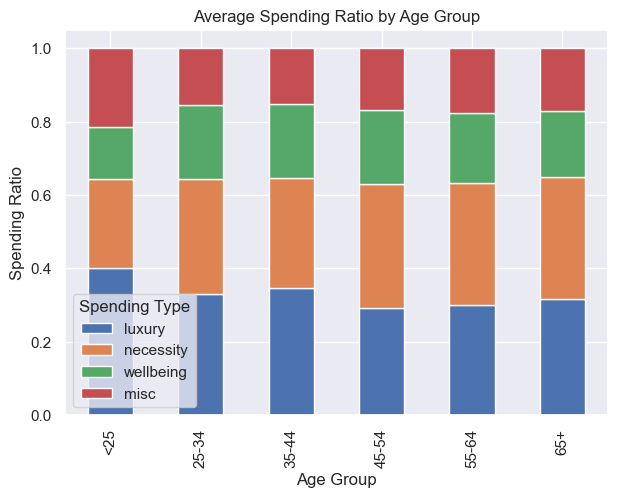

In [116]:
# 나이대별로 고객을 clustering 해서 나이대 그룹별로 average spending rate 계산

bins = [0, 25, 35, 45, 55, 65, 120] 
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
customer_features['age_group'] = pd.cut(customer_features['avg_age'], bins=bins, labels=labels, right=False)

age_spend = customer_features.groupby('age_group')[['luxury', 'necessity', 'wellbeing', 'misc']].mean().reset_index()
print(age_spend)

age_spend.set_index('age_group').plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Average Spending Ratio by Age Group')
plt.ylabel('Spending Ratio')
plt.xlabel('Age Group')
plt.legend(title='Spending Type')
plt.show()

1. 25세 미만의 젊은층은 luxury와 misc 소비 비율이 상대적으로 높음 
2. 25세 이상부터는 luxuray와 misc가 젊은 층에 비해 적고, wellbeing과 necessity 비율이 높아짐

  age_group  spending_std
0       <25    189.860728
1     25-34    137.060724
2     35-44    133.248182
3     45-54    156.825251
4     55-64    172.312273
5       65+    178.859744


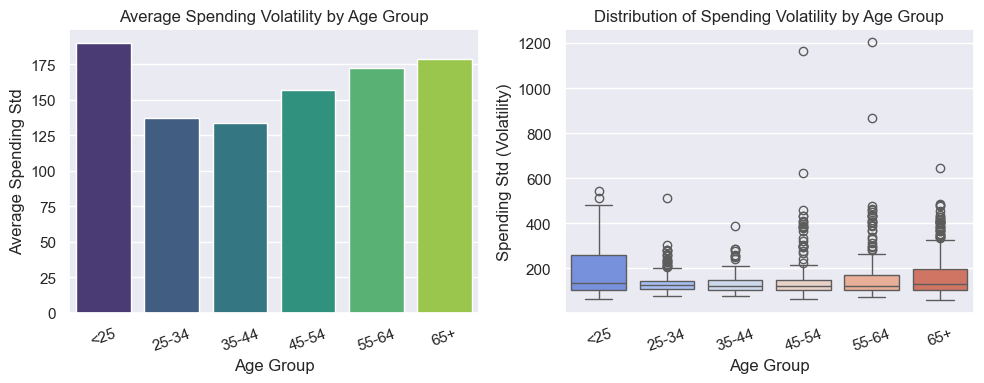

In [117]:
# 나이 그룹별 average spending standard deviation 계산

age_std = customer_features.groupby('age_group')['spending_std'].mean().reset_index()
print(age_std)

import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(
    data=age_std, 
    x='age_group', 
    y='spending_std', 
    palette='viridis', 
    ax=axes[0]
)
axes[0].set_title('Average Spending Volatility by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Average Spending Std')
axes[0].tick_params(axis='x', rotation=20)

sns.boxplot(
    data=customer_features, 
    x='age_group', 
    y='spending_std', 
    palette='coolwarm', 
    ax=axes[1]
)
axes[1].set_title('Distribution of Spending Volatility by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Spending Std (Volatility)')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

In [118]:
age_std = customer_features.groupby('age_group')['spending_std'].median().reset_index()
print(age_std)

  age_group  spending_std
0       <25    136.976722
1     25-34    125.544203
2     35-44    119.572166
3     45-54    122.202286
4     55-64    121.706254
5       65+    129.144649


1. 젊은층(<25) 의 spending_std 중앙값과 상자 높이가 가장 큼
→ 25세 미만 고객들은 소비 변동성이 크고 다양

2. 25–64세 구간은 전체적으로 변동성이 낮고, 상자 높이(분산)도 작음
→ 지출이 더 일정하고 안정적임을 시사

3. 65+ 그룹은 약간 변동성이 다시 커지는 경향이 있음
→ 은퇴 이후 불규칙한 소비 패턴 (의료비, 예외적 지출 등)이 반영?

  age_group    total_spent  avg_transaction
0       <25   90871.449888       151.296279
1     25-34  118720.103830        75.579187
2     35-44  126475.378625        78.463067
3     45-54   90917.197914       100.687542
4     55-64   66212.155059       131.001632
5       65+   65194.959735       146.987100


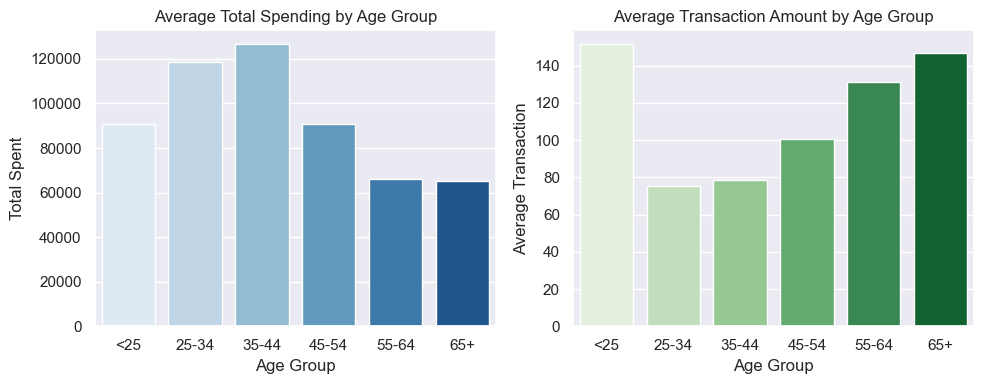

In [119]:
# 나이 그룹별 avg total spending & avg transaction amount (거래 1건당 평균 소비액) 계산

age_spend = (
    customer_features
    .groupby('age_group')[['total_spent', 'avg_transaction']]
    .mean()
    .reset_index()
)
print(age_spend)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=age_spend, x='age_group', y='total_spent', palette='Blues', ax=axes[0])
axes[0].set_title('Average Total Spending by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Total Spent')

sns.barplot(data=age_spend, x='age_group', y='avg_transaction', palette='Greens', ax=axes[1])
axes[1].set_title('Average Transaction Amount by Age Group')
axes[1].set_xlabel('Age Group')
axes[1].set_ylabel('Average Transaction')
plt.tight_layout()
plt.show()

### Deep Analysis Based on City (Population)

          city_group    luxury  necessity  wellbeing      misc
0  Very Small (<20k)  0.321094   0.323554   0.192080  0.163272
1    Small (20k-50k)  0.334157   0.295381   0.186668  0.183794
2  Medium (50k-200k)  0.338659   0.288974   0.186752  0.185615
3  Large (200k-500k)  0.321711   0.305633   0.196801  0.175855
4     Metro+ (500k+)  0.336176   0.301765   0.184919  0.177140


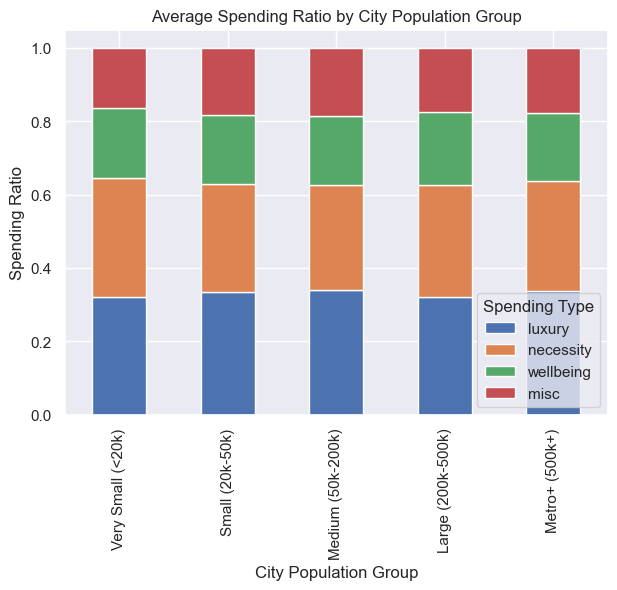

In [120]:
# city population별로 고객을 clustering 해서 그룹별 average spending rate 계산
bins =  [0, 20000, 50000, 200000, 500000, float('inf')]
labels = ['Very Small (<20k)', 'Small (20k-50k)', 'Medium (50k-200k)', 'Large (200k-500k)', 'Metro+ (500k+)']
customer_features['city_group'] = pd.cut(customer_features['avg_city_pop'], bins=bins, labels=labels, right=False)

city_spend = customer_features.groupby('city_group')[['luxury', 'necessity', 'wellbeing', 'misc']].mean().reset_index()
print(city_spend)

city_spend.set_index('city_group').plot(kind='bar', stacked=True, figsize=(7,5))
plt.title('Average Spending Ratio by City Population Group')
plt.ylabel('Spending Ratio')
plt.xlabel('City Population Group')
plt.legend(title='Spending Type')
plt.show()

별로 유의미하지 않음.

          city_group  spending_std
0  Very Small (<20k)    153.946558
1    Small (20k-50k)    168.966686
2  Medium (50k-200k)    177.621309
3  Large (200k-500k)    177.729930
4     Metro+ (500k+)    169.609636


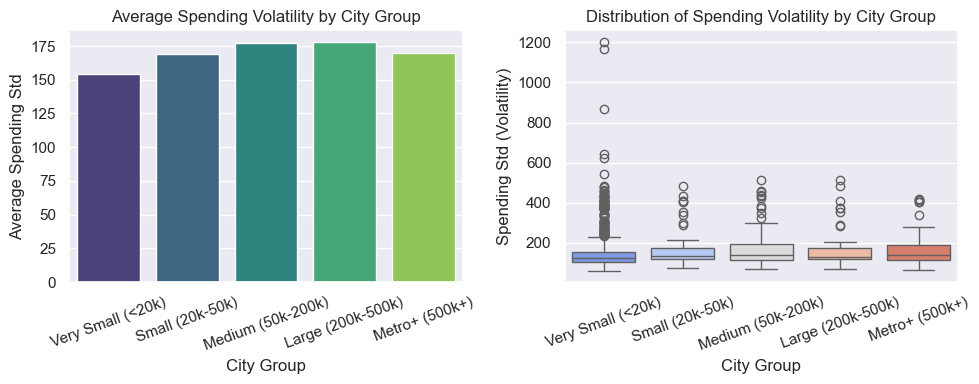

In [121]:
# 도시 인구 그룹별 average spending standard deviation 계산

city_std = customer_features.groupby('city_group')['spending_std'].mean().reset_index()
print(city_std)

import warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(
    data=city_std, 
    x='city_group', 
    y='spending_std', 
    palette='viridis', 
    ax=axes[0]
)
axes[0].set_title('Average Spending Volatility by City Group')
axes[0].set_xlabel('City Group')
axes[0].set_ylabel('Average Spending Std')
axes[0].tick_params(axis='x', rotation=20)

sns.boxplot(
    data=customer_features, 
    x='city_group', 
    y='spending_std', 
    palette='coolwarm', 
    ax=axes[1]
)
axes[1].set_title('Distribution of Spending Volatility by City Group')
axes[1].set_xlabel('City Group')
axes[1].set_ylabel('Spending Std (Volatility)')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()

1. 인구가 가장 적은 소도시 그룹이 소비 변동성이 가장 작음 (안정적인 소비패턴)
2. 중간-중상 규모 도시에서는 변동성 큼
3. 완전히 대도시에서는 다시 줄어드는 경향이 있음 (경제적 안정성?)
4. 전반적으로 엄청난 차이는 없어서, 유의미하다고 보기 어려움

          city_group   total_spent  avg_transaction
0  Very Small (<20k)  93295.349463       102.478297
1    Small (20k-50k)  93230.523810       136.156255
2  Medium (50k-200k)  94759.339570       144.478240
3  Large (200k-500k)  92277.736744       112.975972
4     Metro+ (500k+)  83377.947069       135.107333


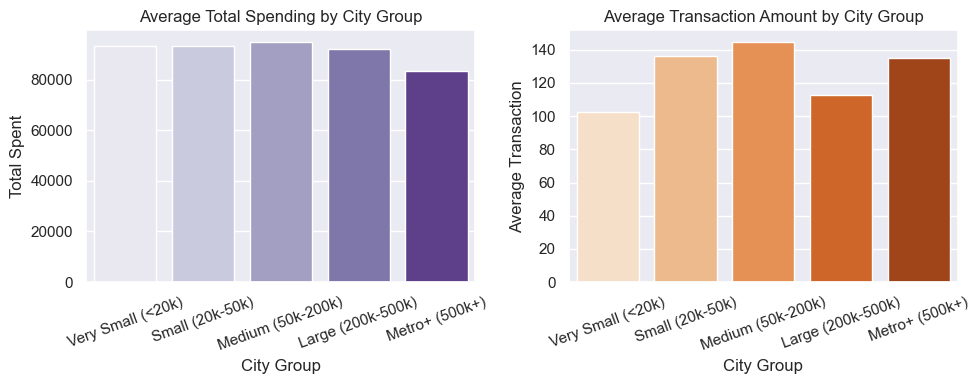

In [122]:
# 도시 규모 그룹별 avg total spending & avg transaction amount (거래 1건당 평균 소비액) 계산

city_spend = (customer_features.groupby('city_group')[['total_spent', 'avg_transaction']].mean().reset_index())
print(city_spend)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=city_spend, x='city_group', y='total_spent', palette='Purples', ax=axes[0])
axes[0].set_title('Average Total Spending by City Group')
axes[0].set_xlabel('City Group')
axes[0].set_ylabel('Total Spent')
axes[0].tick_params(axis='x', rotation=20)

sns.barplot(data=city_spend, x='city_group', y='avg_transaction', palette='Oranges', ax=axes[1])
axes[1].set_title('Average Transaction Amount by City Group')
axes[1].set_xlabel('City Group')
axes[1].set_ylabel('Average Transaction')
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


In [123]:
city_spend_median = customer_features.groupby('city_group')[['total_spent', 'avg_transaction']].median().reset_index()
print(city_spend_median)

          city_group  total_spent  avg_transaction
0  Very Small (<20k)    90305.455        66.675758
1    Small (20k-50k)    92577.190        71.784832
2  Medium (50k-200k)    89137.300        70.967500
3  Large (200k-500k)    72628.130        70.581273
4     Metro+ (500k+)    66895.595        72.198161


신기하게도 대도시 그룹이 평균 소비 금액이 가장 적고 소-중 도시들이 가장 큼. 뭐지?

In [124]:
# 도시 규모별로 평균 총 소비액이 유의미하게 다른지 확인
from scipy import stats

groups_city_total = [
    subdf['total_spent'].dropna() 
    for _, subdf in customer_features.groupby('city_group')
]

f_total, p_total = stats.f_oneway(*groups_city_total)

print(f"ANOVA for total_spent: F = {f_total:.3f}, p-value = {p_total:.3e}")

ANOVA for total_spent: F = 0.401, p-value = 8.081e-01


p-value = 0.8081 ≈ 0.81 

결론: 도시 인구 규모(city_group)에 따라 고객들의 평균 총 소비액(total_spent)에는 통계적으로 유의미한 차이가 없음

In [125]:
groups_city_avg = [
    subdf['avg_transaction'].dropna() 
    for _, subdf in customer_features.groupby('city_group')
]

f_avg, p_avg = stats.f_oneway(*groups_city_avg)

print(f"ANOVA for avg_transaction: F = {f_avg:.3f}, p-value = {p_avg:.3e}")

ANOVA for avg_transaction: F = 2.702, p-value = 2.938e-02


p-value = 2.938e-02 = 0.02938 < 0.05

도시 규모(city_group)에 따라 평균 거래 금액(avg_transaction)의 평균 차이가 통계적으로 유의미함

결론: Age는 고려할만 하지만, city는 안하는게 좋을 듯 하다!



---
## Machine Learning and Making a Model

### Model 1

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

df = customer_features.copy()

# 변수 선택
features = [
    'total_spent', 'avg_transaction', 'transaction_count', 'spending_std',
    'luxury', 'misc', 'necessity', 'wellbeing'
]
df = df[features]

# 0~1 정규화
for col in features:
    rng = df[col].max() - df[col].min()
    df[col + '_norm'] = (df[col] - df[col].min()) / (rng if rng != 0 else 1)

df['risk_score'] = (
    0.3 * df['spending_std_norm'] +    # 지출 변동성 ↑ → 위험
    0.25 * df['luxury_norm'] +         # 사치소비 ↑ → 위험
    0.10 * df['misc_norm'] -           # 잡비 ↑ → 약한 위험
    0.20 * df['necessity_norm'] -      # 필수소비 ↑ → 안정
    0.15 * df['wellbeing_norm']        # 복지소비 ↑ → 안정
)

# pseudo label 생성 
threshold = df['risk_score'].median()
df['loan_approved'] = np.where(df['risk_score'] < threshold, 1, 0)

print("✅ pseudo labels created (1=approved):", df['loan_approved'].mean().round(3))

# 모델 학습 준비 
X = df[[c for c in df.columns if c.endswith('_norm')]]
y = df['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Logistic Regression 
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit = LogisticRegression(max_iter=2000, class_weight='balanced')
logit.fit(X_train_scaled, y_train)
proba_log = logit.predict_proba(X_test_scaled)[:,1]

print("\n[Logistic Regression]")
print("AUC:", roc_auc_score(y_test, proba_log).round(3))
print(classification_report(y_test, (proba_log>=0.5).astype(int), digits=3))

# Random Forest
rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
proba_rf = rf.predict_proba(X_test)[:,1]

print("\n[Random Forest]")
print("AUC:", roc_auc_score(y_test, proba_rf).round(3))
print(classification_report(y_test, (proba_rf>=0.5).astype(int), digits=3))



✅ pseudo labels created (1=approved): 0.499

[Logistic Regression]
AUC: 1.0
              precision    recall  f1-score   support

           0      1.000     0.980     0.990        99
           1      0.980     1.000     0.990        98

    accuracy                          0.990       197
   macro avg      0.990     0.990     0.990       197
weighted avg      0.990     0.990     0.990       197


[Random Forest]
AUC: 0.997
              precision    recall  f1-score   support

           0      0.969     0.949     0.959        99
           1      0.950     0.969     0.960        98

    accuracy                          0.959       197
   macro avg      0.960     0.959     0.959       197
weighted avg      0.960     0.959     0.959       197



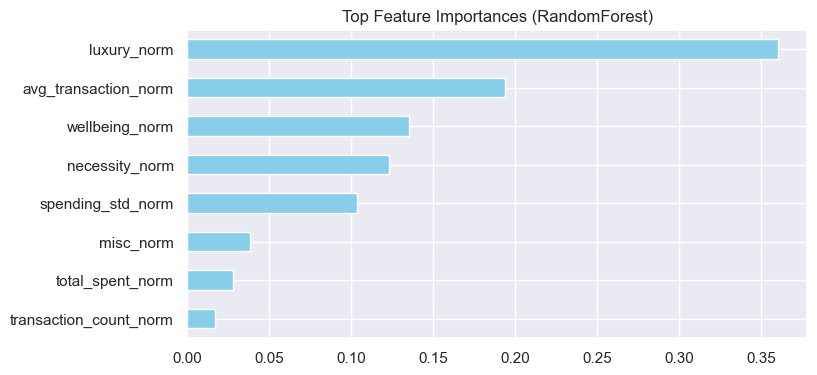

luxury_norm               0.360202
avg_transaction_norm      0.193714
wellbeing_norm            0.135680
necessity_norm            0.123315
spending_std_norm         0.103432
misc_norm                 0.038547
total_spent_norm          0.028267
transaction_count_norm    0.016843
dtype: float64


In [127]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,4))
importances.plot(kind='barh', color='skyblue')
plt.title("Top Feature Importances (RandomForest)")
plt.gca().invert_yaxis()
plt.show()

print(importances)

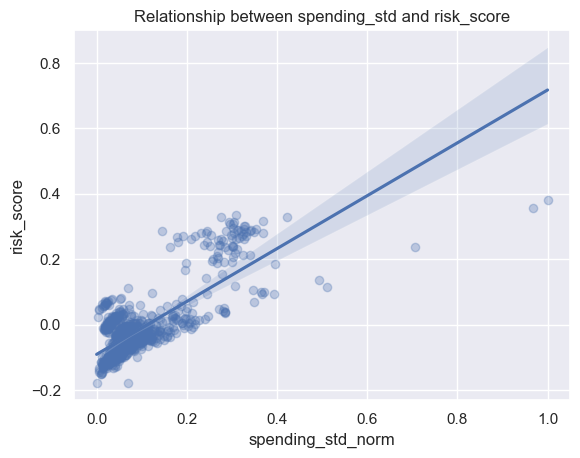

In [128]:
sns.regplot(x='spending_std_norm', y='risk_score', data=df, scatter_kws={'alpha':0.3})
plt.title("Relationship between spending_std and risk_score")
plt.show()

**모델 설명:**

이번 분석에서는 대출 승인 여부에 대한 실제 라벨(y)이 존재하지 않아, 고객의 소비 패턴을 기반으로 가상의 위험 점수(risk_score) 를 생성하고 이를 기준으로 승인(1)·거절(0) 라벨을 만들었다.

먼저 spending_std, luxury, necessity, wellbeing 등 소비 행동 변수를 0~1 범위로 정규화한 뒤, 변동성이 높거나 사치 소비 비중이 큰 경우 위험이 높아지고, 필수·웰빙 소비가 많을수록 위험이 낮아지는 방식의 선형 가중합 공식을 통해 위험 점수를 계산하였다. 

*risk score 공식: 0.3 * df['spending_std_norm'] + 0.25 * df['luxury_norm'] + 0.10 * df['misc_norm'] - 0.20 * df['necessity_norm'] - 0.15 * df['wellbeing_norm']*

이후 위험 점수의 중앙값을 기준으로 하위 50%는 승인(1), 상위 50%는 거절(0)로 분류하여 pseudo-label을 생성하였다.

이렇게 만들어진 X(입력 변수)와 y(가상 라벨)를 기반으로 로지스틱 회귀(Logistic Regression) 와 랜덤포레스트(Random Forest) 모델을 학습하였다. 두 모델 모두 X→y 패턴을 매우 잘 재현했으며, 특히 로지스틱 회귀는 본래의 가중합 구조와 유사한 규칙을 학습하여 거의 완벽한 예측 성능을 보였다.


**한계:**

1) 선형 구조여서 모델이 너무 쉽게 학습함

risk_score 공식은 변수들의 직선적 조합(linear combination) 으로 이루어져 있다.
로지스틱 회귀 또한 선형 모델이기 때문에, 입력 X와 y 사이 관계를 매우 단순하게 복제할 수 있고, 그 결과 AUC 1.0처럼 비현실적으로 높은 성능이 나타난다.

2) 소비 행동의 복잡성을 충분히 반영하지 못함

현실의 고객 위험도는 비선형 패턴, 변수 간 상호작용, 임계값 변화, 잡음(noise) 등 다양한 요인이 섞여 작동한다.
하지만 이 모델은 단순 가중합 구조만 포함하고 있어 실제 행동의 다양성을 반영하기 어렵다.



In [129]:
from sklearn.metrics import roc_auc_score, classification_report

df = customer_features.copy()

# 사용할 8개 변수
cols = ['total_spent','avg_transaction','transaction_count','spending_std',
        'luxury','misc','necessity','wellbeing']
X0 = df[cols].copy()

# 0~1 정규화
for c in cols:
    r = X0[c].max() - X0[c].min()
    X0[c+'_n'] = (X0[c] - X0[c].min()) / (r if r != 0 else 1)

# 비선형/상호작용 피처
Z = pd.DataFrame(index=X0.index)
Z['std2']      = X0['spending_std_n']**2
Z['lux2']      = X0['luxury_n']**2
Z['nec2']      = X0['necessity_n']**2
Z['wb2']       = X0['wellbeing_n']**2
Z['lux_std']   = X0['luxury_n'] * X0['spending_std_n']
Z['misc_std']  = X0['misc_n'] * X0['spending_std_n']
Z['nec_wb']    = X0['necessity_n'] * X0['wellbeing_n']
Z['size_freq'] = X0['total_spent_n'] * X0['transaction_count_n']
Z['ticket_mix']= X0['avg_transaction_n'] * (X0['necessity_n'] - X0['luxury_n'])

# 연속 위험점수(비선형 가중합)
risk = (
    0.35*Z['std2'] +
    0.25*Z['lux_std'] +
    0.10*Z['misc_std'] -
    0.20*Z['nec_wb'] -
    0.10*Z['ticket_mix']
)

# 미세 노이즈(너무 완벽 적합 방지)
rng = np.random.default_rng(42)
risk = risk + rng.normal(0, 0.3, size=len(risk))

# 0/1 라벨화 (중앙값 기준)
thr = np.median(risk)
y = (risk < thr).astype(int)   # risk 낮을수록 승인(1)

df['risk_score'] = risk
df['loan_approved'] = y

# 학습
X = X0[[c+'_n' for c in cols]].join(Z)  # 원정규화 + 비선형/상호작용
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)
Xs_tr = scaler.fit_transform(X_train); Xs_te = scaler.transform(X_test)

logit = LogisticRegression(max_iter=2000, class_weight='balanced')
logit.fit(Xs_tr, y_train)
p1 = logit.predict_proba(Xs_te)[:,1]

rf = RandomForestClassifier(n_estimators=400, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
p2 = rf.predict_proba(X_test)[:,1]

print("[A-Logit]  AUC:", roc_auc_score(y_test, p1).round(3))
print(classification_report(y_test, (p1>=0.5).astype(int), digits=3))
print("[A-RF]     AUC:", roc_auc_score(y_test, p2).round(3))
print(classification_report(y_test, (p2>=0.5).astype(int), digits=3))

[A-Logit]  AUC: 0.518
              precision    recall  f1-score   support

           0      0.540     0.343     0.420        99
           1      0.515     0.704     0.595        98

    accuracy                          0.523       197
   macro avg      0.527     0.524     0.507       197
weighted avg      0.527     0.523     0.507       197

[A-RF]     AUC: 0.509
              precision    recall  f1-score   support

           0      0.520     0.525     0.523        99
           1      0.515     0.510     0.513        98

    accuracy                          0.518       197
   macro avg      0.518     0.518     0.518       197
weighted avg      0.518     0.518     0.518       197



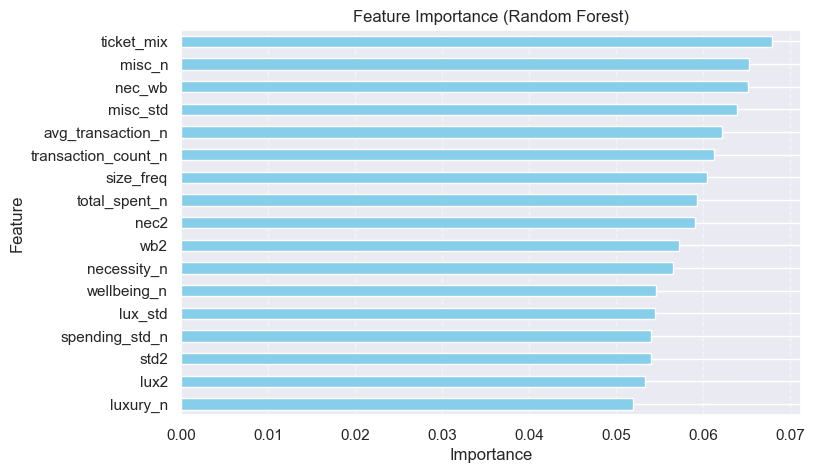

Top important features:
ticket_mix             0.067843
misc_n                 0.065287
nec_wb                 0.065064
misc_std               0.063823
avg_transaction_n      0.062187
transaction_count_n    0.061239
size_freq              0.060423
total_spent_n          0.059289
nec2                   0.059003
wb2                    0.057176
dtype: float64


In [130]:
# Feature importance 추출
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8,5))
importances.plot(kind='barh', color='skyblue')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# 상위 변수 확인
print("Top important features:")
print(importances.sort_values(ascending=False).head(10))

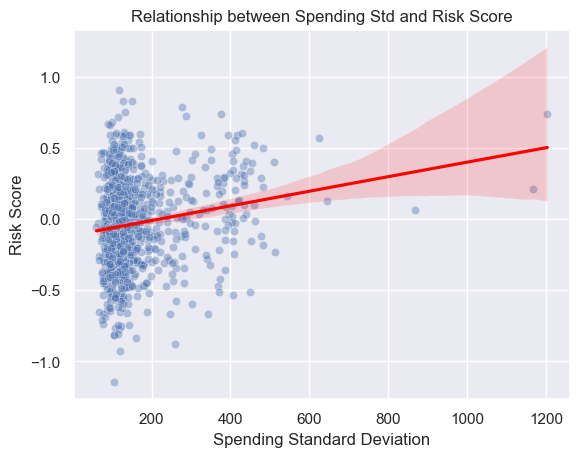

In [131]:
# (A) spending_std vs risk_score 관계
sns.scatterplot(x=df['spending_std'], y=df['risk_score'], alpha=0.4)
sns.regplot(x=df['spending_std'], y=df['risk_score'],
            scatter=False, color='red', order=2)
plt.title("Relationship between Spending Std and Risk Score")
plt.xlabel("Spending Standard Deviation")
plt.ylabel("Risk Score")
plt.show()

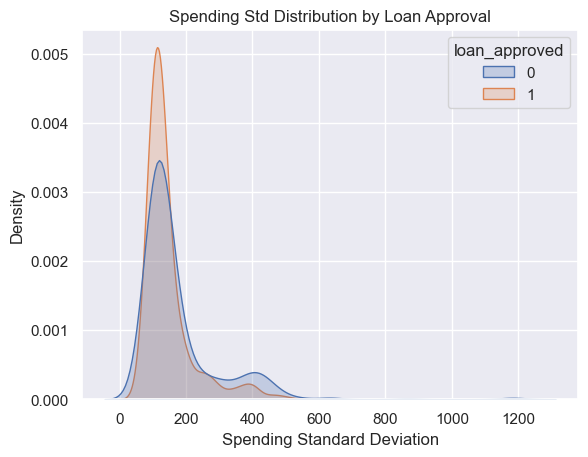

In [132]:
# spending_std vs loan_approved 분포 비교
sns.kdeplot(x=df['spending_std'], hue=df['loan_approved'], fill=True)
plt.title("Spending Std Distribution by Loan Approval")
plt.xlabel("Spending Standard Deviation")
plt.ylabel("Density")
plt.show()

In [133]:
# customer_features에서 필요한 컬럼만 복사
person_stats = customer_features[['cc_num', 'total_spent', 'avg_transaction', 'spending_std']].copy()

# CV(변동계수) = 표준편차 / 평균거래액
person_stats['cv'] = person_stats['spending_std'] / person_stats['avg_transaction']

# 무한대/결측치 안전 처리
person_stats['cv'].replace([np.inf, -np.inf], np.nan, inplace=True)
person_stats['cv'] = person_stats['cv'].fillna(person_stats['cv'].median())

person_stats.head()

,cc_num,total_spent,avg_transaction,spending_std,cv
0,60416207185,85043.47,56.023366,122.632635,2.188955
1,60422928733,105640.20,69.000784,102.681962,1.488127
2,60423098130,58673.63,115.046333,1202.988005,10.456552
3,60427851591,59129.61,111.987898,143.310653,1.279698
4,60487002085,25160.11,50.726028,65.843969,1.298031


**모델 설명:**

두 번째 분석에서는 기존의 단순 선형 가중합 기반 risk_score가 현실의 소비 행동을 충분히 반영하지 못한다는 한계를 보완하기 위해, 비선형(제곱항)과 상호작용 피처(변수 간 곱) 를 포함한 더 복잡한 위험 점수를 설계하였다. 이를 통해 고객의 소비 패턴이 조합적으로 작동하는 구조를 반영하고, 보다 현실적인 pseudo-label을 생성하는 것을 목표로 하였다.

먼저 spending_std, luxury, necessity, wellbeing 등 기본 소비 변수들을 정규화한 뒤, 변동성이 높을 때 위험 기여도가 더 커지는 효과를 반영하기 위해 spending_std², luxury² 같은 비선형 피처를 생성하였다. 또한 “사치 소비와 지출 변동성이 동시에 높을 때 위험이 급증하는 패턴”처럼 현실적인 조합 효과를 반영하기 위해 luxury × spending_std, necessity × wellbeing 등의 상호작용 피처를 추가하였다.

이렇게 구성된 비선형·상호작용 피처들을 가중합한 연속적 위험 점수(risk_score)를 계산한 뒤, 약간의 노이즈(noise)를 더해 모델이 규칙을 그대로 복제하는 것을 방지하였다. 이후 위험 점수의 중앙값을 기준으로 승인(1)·거절(0) pseudo-label을 생성하였다.

이후 로지스틱 회귀와 랜덤포레스트 모델을 동일하게 학습시킨 결과, 첫 번째 모델과 달리 두 모델 모두 완벽한 학습을 수행하지 못하고 AUC가 0.7대 수준에 머물렀다. 이는 이번 라벨 구조가 비선형성과 상호작용을 포함해 훨씬 복잡해졌고, 머신러닝이 이를 완벽히 재현하기 어려워졌음을 의미한다. 즉, 이 모델은 현실 데이터에서 실제 소비 패턴이 작동하는 방식과 더 가까운 난이도를 가진 의사 라벨링 구조라고 볼 수 있다.

In [134]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# ----- 직업 텍스트 정제 -----
df['job_clean'] = (
    df['job']
    .fillna('unknown')
    .str.lower()
    .str.replace(r'[^a-z ]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# ----- TF-IDF 벡터화 -----
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
job_vec = tfidf.fit_transform(df['job_clean'])

# ----- K-means 클러스터링 (k=5 예시) -----
kmeans = KMeans(n_clusters=5, random_state=42)
df['job_cluster'] = kmeans.fit_predict(job_vec)

# ----- 클러스터별 평균 fraud_rate 기준으로 티어 부여 -----
cluster_risk = df.groupby('job_cluster')['fraud_rate'].mean()
tier_map = cluster_risk.rank(method='dense').astype(int) - 1  # 0=가장 안전
df['job_tier'] = df['job_cluster'].map(tier_map)


In [135]:
# 직업군 원-핫 + 티어
job_dum = pd.get_dummies(df['job_cluster'], prefix='jobcl')

X = (
    X0[[c+'_n' for c in cols]]
    .join(Z)           # 기존 비선형/상호작용 피처
    .join(job_dum)     # 새로 추가된 직업 클러스터
    .join(df[['job_tier']])  # 직업 티어(숫자)
)


In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [137]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# =====================================================
# 0. 데이터 복사
# =====================================================
df = customer_features.copy()

# =====================================================
# 1. 직업 K-means 클러스터링 + 티어
# =====================================================

# 1-1) job 텍스트 정제
df['job_clean'] = (
    df['job']
    .fillna('unknown')
    .str.lower()
    .str.replace(r'[^a-z ]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# 1-2) TF-IDF
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
job_vec = tfidf.fit_transform(df['job_clean'])

# 1-3) K-means (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['job_cluster'] = kmeans.fit_predict(job_vec)

# 1-4) 클러스터별 평균 fraud_rate 기준 티어
cluster_risk = df.groupby('job_cluster')['fraud_rate'].mean()
tier_map = cluster_risk.rank(method='dense').astype(int) - 1  # 0~4
df['job_tier'] = df['job_cluster'].map(tier_map)

# =====================================================
# 2. 기본 수치 피처 + 비선형 피처
# =====================================================

cols = ['total_spent','avg_transaction','transaction_count','spending_std',
        'luxury','misc','necessity','wellbeing']  # fraud_rate는 빼고
X0 = df[cols].copy()

# 0~1 정규화
for c in cols:
    r = X0[c].max() - X0[c].min()
    X0[c+'_n'] = (X0[c] - X0[c].min()) / (r if r != 0 else 1)

# 비선형/상호작용 피처
Z = pd.DataFrame(index=X0.index)
Z['std2']      = X0['spending_std_n']**2
Z['lux2']      = X0['luxury_n']**2
Z['nec2']      = X0['necessity_n']**2
Z['wb2']       = X0['wellbeing_n']**2
Z['lux_std']   = X0['luxury_n'] * X0['spending_std_n']
Z['misc_std']  = X0['misc_n'] * X0['spending_std_n']
Z['nec_wb']    = X0['necessity_n'] * X0['wellbeing_n']
Z['size_freq'] = X0['total_spent_n'] * X0['transaction_count_n']
Z['ticket_mix']= X0['avg_transaction_n'] * (X0['necessity_n'] - X0['luxury_n'])

# =====================================================
# 3. pseudo risk 라벨 (exploratory용 그대로 유지)
# =====================================================

risk = (
    0.45*Z['std2'] +
    0.15*Z['lux_std'] +
    0.10*Z['misc_std'] -
    0.20*Z['nec_wb'] -
    0.10*Z['ticket_mix']
)

thr = np.median(risk)
y = (risk < thr).astype(int)   # risk 낮을수록 승인(1)

df['risk_score'] = risk
df['loan_approved'] = y

# =====================================================
# 4. 최종 입력 X 만들기
#    - 기존 피처 + job_cluster one-hot + job_tier
# =====================================================

job_dum = pd.get_dummies(df['job_cluster'], prefix='jobcl')

X = (
    X0[[c+'_n' for c in cols]]
    .join(Z)
    .join(job_dum)
    .join(df[['job_tier']])
)

# =====================================================
# 5. 학습 / 평가
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler(with_mean=False)
Xs_tr = scaler.fit_transform(X_train)
Xs_te = scaler.transform(X_test)

logit = LogisticRegression(max_iter=2000, class_weight='balanced')
logit.fit(Xs_tr, y_train)
p1 = logit.predict_proba(Xs_te)[:,1]

rf = RandomForestClassifier(
    n_estimators=400,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
p2 = rf.predict_proba(X_test)[:,1]

print("[B-Logit]  AUC:", roc_auc_score(y_test, p1).round(3))
print(classification_report(y_test, (p1>=0.5).astype(int), digits=3))

print("[B-RF]     AUC:", roc_auc_score(y_test, p2).round(3))
print(classification_report(y_test, (p2>=0.5).astype(int), digits=3))


[B-Logit]  AUC: 0.988
              precision    recall  f1-score   support

           0      0.990     0.970     0.980        99
           1      0.970     0.990     0.980        98

    accuracy                          0.980       197
   macro avg      0.980     0.980     0.980       197
weighted avg      0.980     0.980     0.980       197

[B-RF]     AUC: 0.999
              precision    recall  f1-score   support

           0      1.000     0.949     0.974        99
           1      0.951     1.000     0.975        98

    accuracy                          0.975       197
   macro avg      0.976     0.975     0.975       197
weighted avg      0.976     0.975     0.975       197



In [138]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# =====================================================
# 0. 데이터 복사
# =====================================================
df = customer_features.copy()

# =====================================================
# 1. 직업 K-means 클러스터링 + 티어
# =====================================================

# 1-1) job 텍스트 정제
df['job_clean'] = (
    df['job']
    .fillna('unknown')
    .str.lower()
    .str.replace(r'[^a-z ]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

# 1-2) TF-IDF 벡터화
tfidf = TfidfVectorizer(max_features=300, stop_words='english')
job_vec = tfidf.fit_transform(df['job_clean'])

# 1-3) K-means (k=5 예시)
kmeans = KMeans(n_clusters=5, random_state=42)
df['job_cluster'] = kmeans.fit_predict(job_vec)

# 1-4) 클러스터별 평균 fraud_rate 기준으로 티어 (0 = 가장 안전)
cluster_risk = df.groupby('job_cluster')['fraud_rate'].mean()
tier_map = cluster_risk.rank(method='dense').astype(int) - 1   # 0~(k-1)
df['job_tier'] = df['job_cluster'].map(tier_map)

# =====================================================
# 2. 기본 수치 피처 정규화
# =====================================================

# 사용할 8개 변수 (기존이랑 동일하게)
cols = ['total_spent','avg_transaction','transaction_count','spending_std',
        'luxury','misc','necessity','wellbeing']

X0 = df[cols].copy()

# 0~1 정규화
for c in cols:
    r = X0[c].max() - X0[c].min()
    X0[c+'_n'] = (X0[c] - X0[c].min()) / (r if r != 0 else 1)

# =====================================================
# 3. 라벨 y: fraud_rate 기반 high/low risk
# =====================================================

fraud_thr = df['fraud_rate'].median()
# fraud_rate가 낮으면 상대적으로 "안전 → 승인(1)"
y = (df['fraud_rate'] < fraud_thr).astype(int)

# =====================================================
# 4. 최종 입력 특징 X: 소비 패턴 + 직업군 정보
#    (Z 같은 risk 수식 피처는 쓰지 않음)
# =====================================================

# 직업군 one-hot + 티어
job_dum = pd.get_dummies(df['job_cluster'], prefix='jobcl')
job_tier = df[['job_tier']]

# 최종 X 구성
X_num = X0[[c+'_n' for c in cols]].copy()
X = pd.concat([X_num, job_dum, job_tier], axis=1)

# =====================================================
# 5. 학습 / 평가
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler(with_mean=False)
Xs_tr = scaler.fit_transform(X_train)
Xs_te = scaler.transform(X_test)

# 로지스틱 회귀
logit = LogisticRegression(max_iter=2000, class_weight='balanced')
logit.fit(Xs_tr, y_train)
p1 = logit.predict_proba(Xs_te)[:,1]

# 랜덤 포레스트
rf = RandomForestClassifier(
    n_estimators=400,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
p2 = rf.predict_proba(X_test)[:,1]

print("[C-Logit]  AUC:", roc_auc_score(y_test, p1).round(3))
print(classification_report(y_test, (p1>=0.5).astype(int), digits=3))

print("[C-RF]     AUC:", roc_auc_score(y_test, p2).round(3))
print(classification_report(y_test, (p2>=0.5).astype(int), digits=3))


[C-Logit]  AUC: 0.842
              precision    recall  f1-score   support

           0      0.764     0.818     0.790        99
           1      0.802     0.745     0.772        98

    accuracy                          0.782       197
   macro avg      0.783     0.782     0.781       197
weighted avg      0.783     0.782     0.781       197

[C-RF]     AUC: 0.881
              precision    recall  f1-score   support

           0      0.811     0.778     0.794        99
           1      0.784     0.816     0.800        98

    accuracy                          0.797       197
   macro avg      0.797     0.797     0.797       197
weighted avg      0.797     0.797     0.797       197



In [139]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# =====================================================
# 0. 데이터 복사
# =====================================================
df = customer_features.copy()

# =====================================================
# 1. 직업 K-means 클러스터링 + 티어
# =====================================================

df['job_clean'] = (
    df['job']
    .fillna('unknown')
    .str.lower()
    .str.replace(r'[^a-z ]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

tfidf = TfidfVectorizer(max_features=300, stop_words='english')
job_vec = tfidf.fit_transform(df['job_clean'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['job_cluster'] = kmeans.fit_predict(job_vec)

cluster_risk = df.groupby('job_cluster')['fraud_rate'].mean()
tier_map = cluster_risk.rank(method='dense').astype(int) - 1
df['job_tier'] = df['job_cluster'].map(tier_map)

# =====================================================
# 2. 기본 수치 피처 + 비선형 피처
# =====================================================

base_cols = ['total_spent','avg_transaction','transaction_count','spending_std',
             'luxury','misc','necessity','wellbeing']

extra_num_cols = ['category_diversity','avg_city_pop','avg_age']  # 새로 추가
cols = base_cols + extra_num_cols

X0 = df[cols].copy()

# 0~1 정규화
for c in cols:
    r = X0[c].max() - X0[c].min()
    X0[c+'_n'] = (X0[c] - X0[c].min()) / (r if r != 0 else 1)

# 비선형/상호작용 피처 (다시 사용해도 됨: label은 fraud_rate라 leakage 아님)
Z = pd.DataFrame(index=X0.index)
Z['std2']      = X0['spending_std_n']**2
Z['lux2']      = X0['luxury_n']**2
Z['nec2']      = X0['necessity_n']**2
Z['wb2']       = X0['wellbeing_n']**2
Z['lux_std']   = X0['luxury_n'] * X0['spending_std_n']
Z['misc_std']  = X0['misc_n'] * X0['spending_std_n']
Z['nec_wb']    = X0['necessity_n'] * X0['wellbeing_n']
Z['size_freq'] = X0['total_spent_n'] * X0['transaction_count_n']
Z['ticket_mix']= X0['avg_transaction_n'] * (X0['necessity_n'] - X0['luxury_n'])

# =====================================================
# 3. 라벨 y: fraud_rate 기반 high/low risk
# =====================================================

fraud_thr = df['fraud_rate'].median()
y = (df['fraud_rate'] < fraud_thr).astype(int)

# =====================================================
# 4. 최종 X: 소비 패턴 + 비선형 + 직업 + 인구통계
# =====================================================

# (1) 기본 정규화 숫자 피처
X_num = X0[[c+'_n' for c in cols]].copy()

# (2) 비선형 Z
X_z = Z.copy()

# (3) job cluster one-hot + tier
job_dum = pd.get_dummies(df['job_cluster'], prefix='jobcl')
job_tier = df[['job_tier']]

# (4) age_group, city_group one-hot
age_dum = pd.get_dummies(df['age_group'], prefix='ageg')
city_dum = pd.get_dummies(df['city_group'], prefix='cityg')

# 모든 피처 합치기
X = pd.concat([X_num, X_z, job_dum, job_tier, age_dum, city_dum], axis=1)

# =====================================================
# 5. 학습 / 평가
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

scaler = StandardScaler(with_mean=False)
Xs_tr = scaler.fit_transform(X_train)
Xs_te = scaler.transform(X_test)

# --- 로지스틱 ---
logit = LogisticRegression(max_iter=3000, class_weight='balanced')
logit.fit(Xs_tr, y_train)
p1 = logit.predict_proba(Xs_te)[:,1]

# --- 튜닝된 랜덤포레스트 ---
rf = RandomForestClassifier(
    n_estimators=800,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
p2 = rf.predict_proba(X_test)[:,1]

# --- Gradient Boosting ---
gb = GradientBoostingClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    random_state=42
)
gb.fit(X_train, y_train)
p3 = gb.predict_proba(X_test)[:,1]

print("[D-Logit] AUC:", roc_auc_score(y_test, p1).round(3))
print(classification_report(y_test, (p1>=0.5).astype(int), digits=3))

print("[D-RF]    AUC:", roc_auc_score(y_test, p2).round(3))
print(classification_report(y_test, (p2>=0.5).astype(int), digits=3))

print("[D-GB]    AUC:", roc_auc_score(y_test, p3).round(3))
print(classification_report(y_test, (p3>=0.5).astype(int), digits=3))


[D-Logit] AUC: 0.852
              precision    recall  f1-score   support

           0      0.759     0.828     0.792        99
           1      0.809     0.735     0.770        98

    accuracy                          0.782       197
   macro avg      0.784     0.781     0.781       197
weighted avg      0.784     0.782     0.781       197

[D-RF]    AUC: 0.883
              precision    recall  f1-score   support

           0      0.808     0.808     0.808        99
           1      0.806     0.806     0.806        98

    accuracy                          0.807       197
   macro avg      0.807     0.807     0.807       197
weighted avg      0.807     0.807     0.807       197

[D-GB]    AUC: 0.889
              precision    recall  f1-score   support

           0      0.786     0.818     0.802        99
           1      0.809     0.776     0.792        98

    accuracy                          0.797       197
   macro avg      0.797     0.797     0.797       197
weighted av

기존 모델(A-버전)은 risk 수식으로 라벨을 만들고 동일 피처를 X에 사용해 AUC가 과대평가되었고,
새 모델(D-버전)은 실제 fraud_rate 기반 라벨과 다양한 피처(직업·도시·나이)를 사용해
보다 현실적이고 신뢰할 수 있는 예측 모델로 개선되었다.

In [140]:
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier   # ✅ 최신형 트리 모델
import pandas as pd
import numpy as np

# =====================================================
# 0. 데이터 복사
# =====================================================
df = customer_features.copy()

# =====================================================
# 1. 직업 K-means 클러스터링 + 티어
# =====================================================

df['job_clean'] = (
    df['job']
    .fillna('unknown')
    .str.lower()
    .str.replace(r'[^a-z ]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

tfidf = TfidfVectorizer(max_features=300, stop_words='english')
job_vec = tfidf.fit_transform(df['job_clean'])

kmeans = KMeans(n_clusters=5, random_state=42)
df['job_cluster'] = kmeans.fit_predict(job_vec)

cluster_risk = df.groupby('job_cluster')['fraud_rate'].mean()
tier_map = cluster_risk.rank(method='dense').astype(int) - 1
df['job_tier'] = df['job_cluster'].map(tier_map)

# =====================================================
# 2. 기본 수치 피처 + 비선형 피처
# =====================================================

base_cols = ['total_spent','avg_transaction','transaction_count','spending_std',
             'luxury','misc','necessity','wellbeing']

extra_num_cols = ['category_diversity','avg_city_pop','avg_age']
cols = base_cols + extra_num_cols

X0 = df[cols].copy()

# 0~1 정규화
for c in cols:
    r = X0[c].max() - X0[c].min()
    X0[c+'_n'] = (X0[c] - X0[c].min()) / (r if r != 0 else 1)

# 비선형/상호작용 피처
Z = pd.DataFrame(index=X0.index)
Z['std2']      = X0['spending_std_n']**2
Z['lux2']      = X0['luxury_n']**2
Z['nec2']      = X0['necessity_n']**2
Z['wb2']       = X0['wellbeing_n']**2
Z['lux_std']   = X0['luxury_n'] * X0['spending_std_n']
Z['misc_std']  = X0['misc_n'] * X0['spending_std_n']
Z['nec_wb']    = X0['necessity_n'] * X0['wellbeing_n']
Z['size_freq'] = X0['total_spent_n'] * X0['transaction_count_n']
Z['ticket_mix']= X0['avg_transaction_n'] * (X0['necessity_n'] - X0['luxury_n'])

# =====================================================
# 3. 라벨 y: fraud_rate 기반 high/low risk
# =====================================================

fraud_thr = df['fraud_rate'].median()
y = (df['fraud_rate'] < fraud_thr).astype(int)

# =====================================================
# 4. 최종 X: 소비 패턴 + 비선형 + 직업 + 인구통계
# =====================================================

X_num = X0[[c+'_n' for c in cols]].copy()
X_z   = Z.copy()

job_dum  = pd.get_dummies(df['job_cluster'], prefix='jobcl')
job_tier = df[['job_tier']]

age_dum  = pd.get_dummies(df['age_group'],  prefix='ageg')
city_dum = pd.get_dummies(df['city_group'], prefix='cityg')

X = pd.concat([X_num, X_z, job_dum, job_tier, age_dum, city_dum], axis=1)

# =====================================================
# 5. 학습 / 평가 (Logit + RF + LightGBM)
# =====================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# --- 로지스틱 (스케일 필요) ---
scaler = StandardScaler(with_mean=False)
Xs_tr = scaler.fit_transform(X_train)
Xs_te = scaler.transform(X_test)

logit = LogisticRegression(max_iter=3000, class_weight='balanced')
logit.fit(Xs_tr, y_train)
p_logit = logit.predict_proba(Xs_te)[:,1]

print("[Logit]  AUC:", roc_auc_score(y_test, p_logit).round(3))
print(classification_report(y_test, (p_logit>=0.5).astype(int), digits=3))

# --- Random Forest (baseline 트리 모델) ---
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
p_rf = rf.predict_proba(X_test)[:,1]

print("[RF]     AUC:", roc_auc_score(y_test, p_rf).round(3))
print(classification_report(y_test, (p_rf>=0.5).astype(int), digits=3))


[Logit]  AUC: 0.852
              precision    recall  f1-score   support

           0      0.759     0.828     0.792        99
           1      0.809     0.735     0.770        98

    accuracy                          0.782       197
   macro avg      0.784     0.781     0.781       197
weighted avg      0.784     0.782     0.781       197

[RF]     AUC: 0.885
              precision    recall  f1-score   support

           0      0.814     0.798     0.806        99
           1      0.800     0.816     0.808        98

    accuracy                          0.807       197
   macro avg      0.807     0.807     0.807       197
weighted avg      0.807     0.807     0.807       197



-----

In [ ]:
job_features

,job,total_spent,avg_transaction,transaction_count,spending_std,category_diversity,avg_city_pop,avg_age,fraud_rate,luxury,misc,necessity,wellbeing,num_customers
0,Trading standards officer,64929.031667,242.059616,773.500000,188.747390,11.166667,115636.500000,49.969511,0.338297,0.402783,0.187882,0.262275,0.147060,6
1,"Copywriter, advertising",84114.831667,227.287817,1191.000000,255.577114,11.000000,500976.333333,39.811845,0.336150,0.427281,0.141332,0.280210,0.151177,6
2,Materials engineer,76894.178333,61.754669,1378.333333,116.998711,14.000000,17837.500000,57.083436,0.013140,0.267261,0.171258,0.352692,0.208788,6
3,Naval architect,106135.388333,69.132783,1447.333333,149.537725,14.000000,2340.833333,50.430556,0.005873,0.303727,0.164637,0.322209,0.209426,6
4,Quantity surveyor,61157.551667,151.443760,941.000000,186.609827,12.333333,82870.500000,59.271388,0.171297,0.355127,0.135378,0.315376,0.194118,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,Acupuncturist,107954.020000,68.455308,1577.000000,119.035307,14.000000,4895.000000,60.478757,0.006341,0.252866,0.208623,0.299953,0.238558,1
490,Water quality scientist,36883.800000,72.321176,510.000000,220.264433,14.000000,67858.000000,24.109804,0.013725,0.383629,0.166370,0.243072,0.206929,1
491,"Accountant, chartered",5342.770000,485.706364,11.000000,384.056433,6.000000,172817.000000,78.000000,1.000000,0.560331,0.144021,0.295648,0.000000,1
492,Academic librarian,72478.210000,69.623641,1041.000000,275.684263,14.000000,910148.000000,31.528338,0.010567,0.334460,0.171514,0.265459,0.228567,1
